# Засоби підготовки та аналізу даних
### ФБ-22 Перевузник Ілля
##### Лабораторна робота №6

Згенеруйте двовимірні дані (xx, yy) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (yy = kk + bb) для подальшого аналізу результатів.

In [11]:
import numpy as np

# Задаємо параметри прямої
k = 5  # Похила коефіцієнт
b = 2 # Зсув

# Кількість точок, які потрібно згенерувати
num_points = 100

# Генеруємо випадкові значення для xx
x = np.random.uniform(0, 10, num_points)

# Генеруємо випадковий шум для yy
noise = np.random.normal(0, 10, num_points)

# Обчислюємо yy, використовуючи лінійну функцію та доданий шум
y = k * x + b + noise




Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k та b.

In [12]:

def least_squares_method(x, y):
    # Обчислення сум
    up_sum = np.sum((x - x.mean()) * (y - y.mean()))
    down_sum = np.sum((x - x.mean())**2)
    
    # Обчислення оптимальних оцінок параметрів k та b
    k = up_sum/down_sum
    b = y.mean() - k * x.mean()
    
    return k, b


k_opt, b_opt = least_squares_method(x, y)
print("Оптимальна оцінка для параметра k:", k_opt)
print("Оптимальна оцінка для параметра b:", b_opt)

print("Оригінальне значення нахилу (k):", k)
print("Оригінальне значення зміщення (b):", b)

Оптимальна оцінка для параметра k: 5.023899863986652
Оптимальна оцінка для параметра b: 2.7638244529114218
Оригінальне значення нахилу (k): 5
Оригінальне значення зміщення (b): 2


Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).

In [13]:
polyfit_params = np.polyfit(x, y, 1)

print("Оцінка нахилу за допомогою np.polyfit():", polyfit_params[0])
print("Оцінка зміщення за допомогою np.polyfit():", polyfit_params[1])

Оцінка нахилу за допомогою np.polyfit(): 5.023899863986653
Оцінка зміщення за допомогою np.polyfit(): 2.7638244529114115


Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).

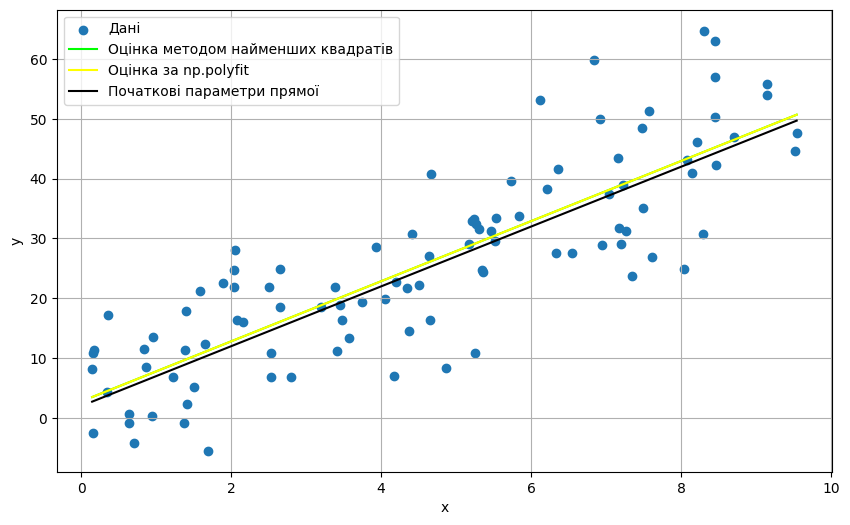

In [14]:
import matplotlib.pyplot as plt
line_x = np.linspace(np.min(x), np.max(x), 100)
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Дані')
plt.plot(line_x, k_opt * line_x + b_opt, color='lime', label='Оцінка методом найменших квадратів')
plt.plot(line_x, polyfit_params[0] * line_x + polyfit_params[1], color='yellow', label='Оцінка за np.polyfit')
plt.plot(line_x, k * line_x + b, color='black', label='Початкові параметри прямої')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [17]:
def gradient_descent(x, y, learning_rate = 0.01, n = 1000):
    # Ініціалізуємо випадковими значеннями параметри k та b
    k = np.random.randn()
    b = np.random.randn()
    
    # Кількість прикладів
    m = len(x)
    
    # Градієнтний спуск
    for _ in range(n):
        # Рахуємо прогнозоване значення y
        y_pred = k * x + b
        
        # Обчислюємо градієнти за k та b
        gradient_k = -(2/m) * np.sum(x * (y - y_pred))
        gradient_b = -(2/m) * np.sum(y - y_pred)
        
        # Оновлюємо параметри k та b за допомогою градієнтного спуску
        k -= learning_rate * gradient_k
        b -= learning_rate * gradient_b
    
    return k, b


learning_rate = 0.01
n = 1000

optimal_k, optimal_b = gradient_descent(x, y, learning_rate, n)
print("Оптимальна оцінка для параметра k:", optimal_k)
print("Оптимальна оцінка для параметра b:", optimal_b)

Оптимальна оцінка для параметра k: 5.024440451631312
Оптимальна оцінка для параметра b: 2.760505910629488


 Додайте отриману лінію регресії на загальний графік

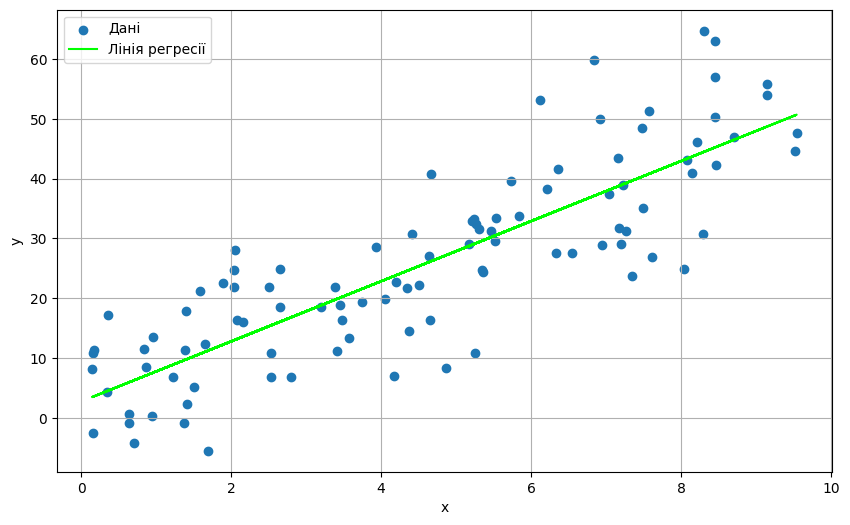

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Дані')
plt.plot(x, optimal_k * x + optimal_b, color='lime', label='Лінія регресії')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Побудуйте графік похибки від кількості ітерацій, зробіть висновки

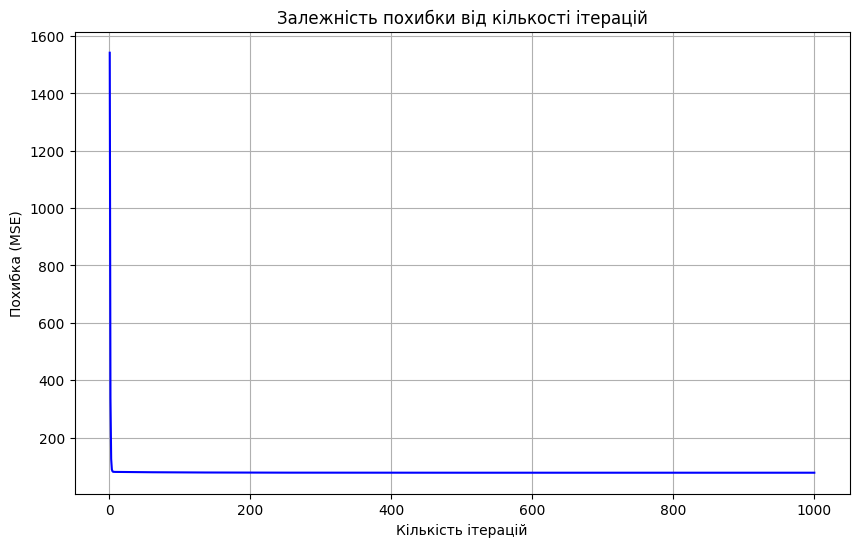

In [19]:

def gradient_descent(x, y, learning_rate = 0.01, n = 1000):
    # Ініціалізуємо випадковими значеннями параметри k та b
    k = np.random.randn()
    b = np.random.randn()
    
    # Кількість прикладів
    m = len(x)
    
    # Зберігатимемо значення функції втрат на кожній ітерації
    loss_history = []
    
    # Градієнтний спуск
    for _ in range(n):
        # Рахуємо прогнозоване значення y
        y_pred = k * x + b
        
        # Обчислюємо градієнти за k та b
        gradient_k = -(2/m) * np.sum(x * (y - y_pred))
        gradient_b = -(2/m) * np.sum(y - y_pred)
        
        # Оновлюємо параметри k та b за допомогою градієнтного спуску
        k -= learning_rate * gradient_k
        b -= learning_rate * gradient_b
        
        # Обчислюємо середньоквадратичну помилку та зберігаємо її значення
        mse = np.mean((y - y_pred) ** 2)
        loss_history.append(mse)
    
    return k, b, loss_history

learning_rate = 0.01
n = 1000

optimal_k, optimal_b, loss_history = gradient_descent(x, y, learning_rate, n)

# Побудова графіку похибки від кількості ітерацій
plt.figure(figsize=(10, 6))
plt.plot(range(1, n + 1), loss_history, color='blue')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка (MSE)')
plt.title('Залежність похибки від кількості ітерацій')
plt.grid(True)
plt.show()


#### Порівняйте отримані результати з результатами попереднього завдання

In [21]:
estimated_k_polyfit = polyfit_params[0]
estimated_b_polyfit = polyfit_params[1]

# Виведення результатів
print("Оптимальний нахил (градієнтний спуск):", optimal_k)
print("Оптимальне зміщення (градієнтний спуск):", optimal_b)
print("Оцінка нахилу (метод найменших квадратів):", k_opt)
print("Оцінка зміщення (метод найменших квадратів):", b_opt)
print("Оцінка нахилу (np.polyfit()):", estimated_k_polyfit)
print("Оцінка зміщення (np.polyfit()):", estimated_b_polyfit)

Оптимальний нахил (градієнтний спуск): 5.027216487091133
Оптимальне зміщення (градієнтний спуск): 2.7434644722234207
Оцінка нахилу (метод найменших квадратів): 5.023899863986652
Оцінка зміщення (метод найменших квадратів): 2.7638244529114218
Оцінка нахилу (np.polyfit()): 5.023899863986653
Оцінка зміщення (np.polyfit()): 2.7638244529114115
